<a href="https://colab.research.google.com/github/VarshaAwasthi0812/Image-Processing/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10
from keras import utils
import numpy as np
!pip install utils
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from keras.layers import BatchNormalization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
tf.__version__

'2.8.2'

In [ ]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 135 kB 27.9 MB/s 
     |████████████████████████████████| 1.6 MB 66.1 MB/s 


Data Collection and PreProcessing

In [4]:
# CIFAR Dataset: 50k training samples and 10k test samples with 
# Multiclass Classification(10 output classes) of 32x32 pixel images 
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

# one-hot encoding for the labels (1,2 ...) will be replaced by arrays with 1s and 0s
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)

# normalize the data (test and training set as well)-minmaxscaling
X_train = X_train / 255.0
X_test = X_test / 255.0

Data Verification

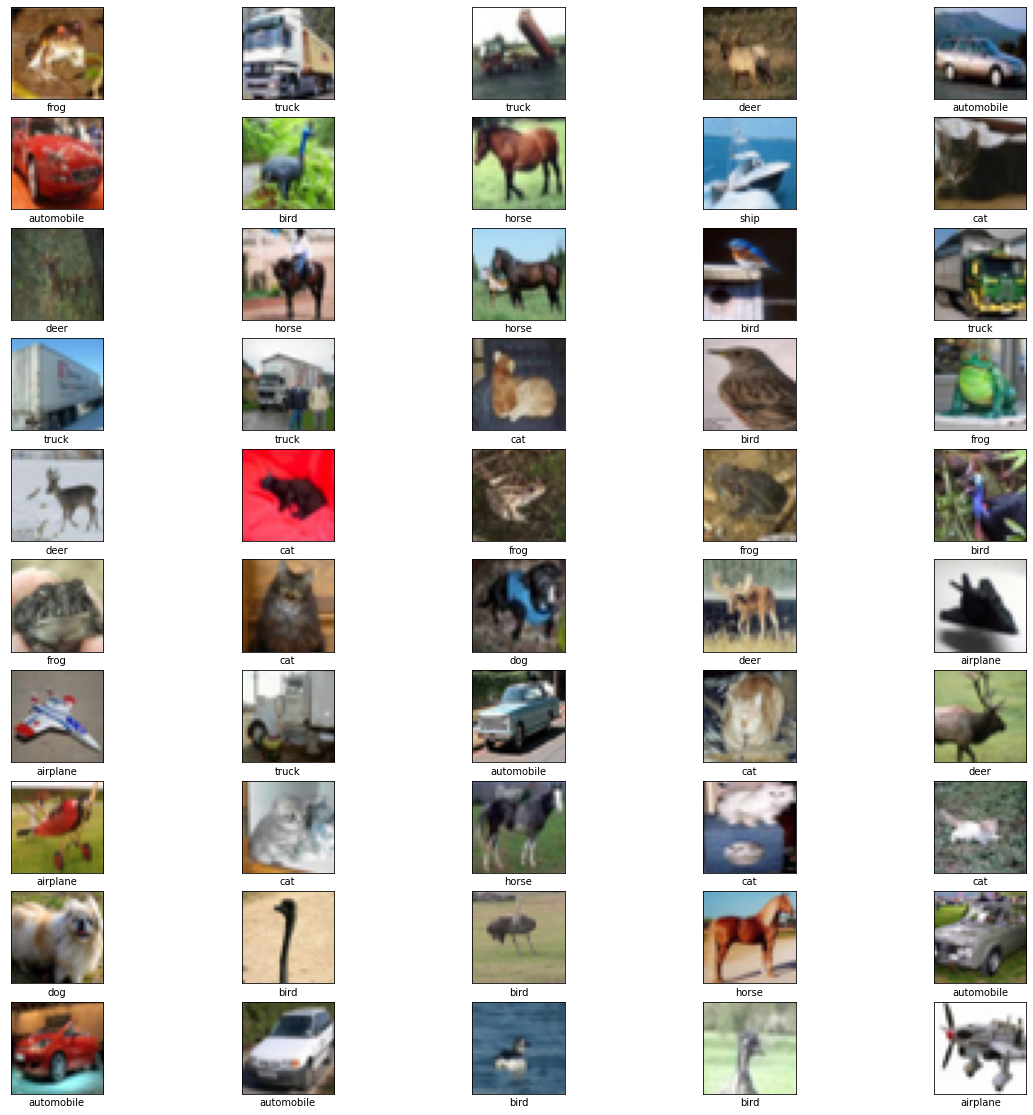

In [5]:
#First 50 images plotted
import matplotlib.pyplot as plt
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(20,20))
for i in range(50):
  plt.subplot(10,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[int(i)])
  plt.xlabel(class_names[Y_train[i][0]])
plt.show()

CNN Construction

In [6]:
# construct the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [7]:
# training the model
optimizer = SGD(lr=0.001, momentum=0.95)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=2)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
782/782 - 19s - loss: 1.6948 - accuracy: 0.3858 - val_loss: 1.4822 - val_accuracy: 0.4768 - 19s/epoch - 24ms/step
Epoch 2/100
782/782 - 7s - loss: 1.3454 - accuracy: 0.5100 - val_loss: 1.2000 - val_accuracy: 0.5745 - 7s/epoch - 8ms/step
Epoch 3/100
782/782 - 7s - loss: 1.1833 - accuracy: 0.5746 - val_loss: 1.0734 - val_accuracy: 0.6216 - 7s/epoch - 9ms/step
Epoch 4/100
782/782 - 7s - loss: 1.0685 - accuracy: 0.6142 - val_loss: 1.1152 - val_accuracy: 0.6139 - 7s/epoch - 9ms/step
Epoch 5/100
782/782 - 7s - loss: 0.9812 - accuracy: 0.6473 - val_loss: 0.9665 - val_accuracy: 0.6541 - 7s/epoch - 9ms/step
Epoch 6/100
782/782 - 7s - loss: 0.9142 - accuracy: 0.6731 - val_loss: 0.8959 - val_accuracy: 0.6828 - 7s/epoch - 9ms/step
Epoch 7/100
782/782 - 7s - loss: 0.8599 - accuracy: 0.6941 - val_loss: 0.8120 - val_accuracy: 0.7162 - 7s/epoch - 9ms/step
Epoch 8/100
782/782 - 7s - loss: 0.8094 - accuracy: 0.7127 - val_loss: 0.8762 - val_accuracy: 0.6939 - 7s/epoch - 9ms/step
Epoch 9/100
7

Model Evaluation

Text(0, 0.5, 'accuracy')

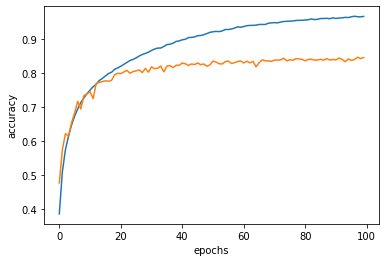

In [8]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')



In [9]:
model_result = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy of CNN model: %s' % (model_result[1] * 100.0))

Accuracy of CNN model: 84.50000286102295
